In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log, dot, e
%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

##### For Building the Model #####
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Loading and Preprocessing Data

In [2]:
### Cancer dataset
df = pd.read_csv("lung_cancer_data.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)
print("Size of data:", df.shape)
df.head()

Size of data: (1000, 25)


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [3]:
predictor_df = df.copy()

In [4]:
predictor_df.drop(columns=['Frequent Cold', 'Dry Cough', 'Snoring'] , axis=1, inplace=True)
predictor_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Level
0,P1,33,1,2,4,5,4,3,2,2,...,2,2,4,3,4,2,2,3,1,Low
1,P10,17,1,3,1,5,3,4,2,2,...,4,2,3,1,3,7,8,6,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,3,4,8,8,7,9,2,1,4,High
3,P1000,37,1,7,7,7,7,6,7,7,...,7,7,8,4,2,3,1,4,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,7,7,9,3,2,4,1,4,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,8,7,7,5,3,2,7,8,2,High
996,P996,37,2,6,8,7,7,7,6,7,...,8,7,7,9,6,5,7,2,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,3,4,8,8,7,9,2,1,4,High
998,P998,18,2,6,8,7,7,7,6,7,...,7,7,9,3,2,4,1,4,2,High


In [5]:
predictor_df = predictor_df.replace({'Level' : {'Low': 1, 'Medium': 2, 'High': 3}})
predictor_df.head(10)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Level
0,P1,33,1,2,4,5,4,3,2,2,...,2,2,4,3,4,2,2,3,1,1
1,P10,17,1,3,1,5,3,4,2,2,...,4,2,3,1,3,7,8,6,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,3,4,8,8,7,9,2,1,4,3
3,P1000,37,1,7,7,7,7,6,7,7,...,7,7,8,4,2,3,1,4,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,7,7,9,3,2,4,1,4,2,3
5,P102,35,1,4,5,6,5,5,4,6,...,3,4,8,8,7,9,2,1,4,3
6,P103,52,2,2,4,5,4,3,2,2,...,2,2,4,3,4,2,2,3,1,1
7,P104,28,2,3,1,4,3,2,3,4,...,4,3,1,3,2,2,4,2,2,1
8,P105,35,2,4,5,6,5,6,5,5,...,6,6,5,1,4,3,2,4,6,2
9,P106,46,1,2,3,4,2,4,3,3,...,3,4,4,1,2,4,6,5,4,2


In [6]:
y = predictor_df.Level.values
x_data = predictor_df.drop(['Patient Id', 'Level'], axis = 1)
x_data

,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails
0,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1
1,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2
2,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4
3,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5
4,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2
996,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4
997,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4
998,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2


In [7]:
###Data Standardization
x_min = np.min(x_data, axis=0)
x_max = np.max(x_data, axis=0) 
x = (x_data - x_min)/(x_max- x_min).values
x

Gender                      1
Air Pollution               1
Alcohol use                 1
Dust Allergy                1
OccuPational Hazards        1
Genetic Risk                1
chronic Lung Disease        1
Balanced Diet               1
Obesity                     1
Smoking                     1
Passive Smoker              1
Chest Pain                  1
Coughing of Blood           1
Fatigue                     1
Weight Loss                 1
Shortness of Breath         1
Wheezing                    1
Swallowing Difficulty       1
Clubbing of Finger Nails    1
dtype: int64


,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails
0,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.166667,0.500000,0.285714,0.142857,0.125,0.375,0.250,0.428571,0.125,0.142857,0.285714,0.000
1,0.0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,0.166667,0.142857,0.428571,0.125,0.250,0.000,0.285714,0.750,1.000000,0.714286,0.125
2,0.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,0.142857,0.285714,0.375,0.875,0.875,0.857143,1.000,0.142857,0.000000,0.375
3,0.0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,1.000000,0.857143,0.857143,0.750,0.875,0.375,0.142857,0.250,0.000000,0.428571,0.500
4,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,1.000000,0.857143,0.750,1.000,0.250,0.142857,0.375,0.000000,0.428571,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.714286,0.857143,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,0.857143,1.000000,0.750,0.750,0.500,0.285714,0.125,0.857143,1.000000,0.125
996,1.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,0.857143,1.000000,0.750,0.750,1.000,0.714286,0.500,0.857143,0.142857,0.375
997,1.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,0.142857,0.285714,0.375,0.875,0.875,0.857143,1.000,0.142857,0.000000,0.375
998,1.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,1.000000,0.857143,0.750,1.000,0.250,0.142857,0.375,0.000000,0.428571,0.125


In [8]:
### Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (750, 19)
y_train size: (750,)

x_test size: (250, 19)
y_test size: (250,)


### Setting Up Models

#### Logistic Regression

In [9]:
#note: w = theta
def sum(x, w):
    return np.dot(x, w)

def sigmoid(z):
    return 1/(1+e**(-z))

In [10]:
def predict(x, w):
    z = sum(x,w)
    p = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in p]

In [11]:
def calculate_cost(p, y, m):
    y_1 = y*np.log(p)
    y_0 = (1-y)*np.log(1-p)
    return -(np.sum(y_1 + y_0))/m

In [12]:
def compute_gradients(p, y, x):
    gradients = np.dot((p-y),x)
    return gradients

def evaluate_predictions(y,y_hat):
    accuracy = accuracy_score(train_pred, y_train)
    metrics = precision_recall_fscore_support(train_pred, y_train,average='macro')
    
    return np.append(accuracy,metrics)

def confusion_matrix(y,y_hat):
    cm = confusion_matrix(y_test,y_pred)
    return cm

In [13]:
init_w = np.array([0]*20)

lr_costs = []

In [14]:
def grad_descent(w, x, y, iterations, lr):
    m = y.size
    costs = []
    for _ in range(iterations):
        p = sigmoid(sum(x,w))
        cost = calculate_cost(p, y, m)
        costs.append(cost)
        gradients = compute_gradients(p,y,x)
        w = w - (lr * gradients) / m
    return w, costs

#### Naive Bayes

### Using models on dataset

#### Logistic Regression

In [15]:
w, costs = grad_descent(init_w, x_train, y_train, 1000, 0.8)
w

C:\Users\Victor\AppData\Local\Temp\ipykernel_14392\3762698079.py:3: RuntimeWarning: divide by zero encountered in log
  y_0 = (1-y)*np.log(1-p)
C:\Users\Victor\AppData\Local\Temp\ipykernel_14392\3762698079.py:3: RuntimeWarning: invalid value encountered in multiply
  y_0 = (1-y)*np.log(1-p)


array([270.02826473, 450.14448584, 585.49569472, 616.77211926,
       577.58990548, 645.03825255, 579.42525165, 634.89862088,
       654.09770915, 463.86711403, 515.99152757, 469.37320627,
       545.39372765, 397.87415581, 403.51548407, 429.89744017,
       359.1678835 , 367.2422479 , 355.21534486])

In [16]:
train_pred = predict(x_train,w)
evaluate_predictions(train_pred, y_train)

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.316, 0.3333333333333333, 0.10533333333333333,
       0.16008105369807496, None], dtype=object)

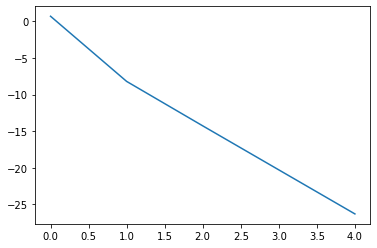

In [17]:
plt.plot(costs)

In [18]:
test_pred = predict(x_test,w)
accuracy_score(test_pred, y_test)

0.264

In [19]:
#SKLearn Logistic Regression model comparison
reg = LogisticRegression().fit(x_train, y_train)
y_pred = reg.predict(x_train)
evaluate_predictions(y_pred, y_train)

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.316, 0.3333333333333333, 0.10533333333333333,
       0.16008105369807496, None], dtype=object)

In [20]:
y_pred_t = reg.predict(x_test)
evaluate_predictions(y_pred_t, y_test)

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.316, 0.3333333333333333, 0.10533333333333333,
       0.16008105369807496, None], dtype=object)